In [2]:
from histolab.data import prostate_tissue, ovarian_tissue

In [2]:
# import os
# os.add_dll_directory(r'D:\soft\openslide-win64-20171122\bin')
# import openslide

In [3]:
prostate_svs, prostate_path = prostate_tissue()
# ovarian_svs, ovarian_path = ovarian_tissue()

In [4]:
prostate_path

'C:\\Users\\Administrator\\AppData\\Local\\histolab-images\\histolab-images\\Cache\\0.5.1\\data\\..\\tcga/prostate/TCGA-CH-5753-01A-01-BS1.4311c533-f9c1-4c6f-8b10-922daa3c2e3e.svs'

In [5]:
from histolab.slide import Slide

In [8]:
from PIL import Image 
Image.MAX_IMAGE_PIXELS = 14330458600
# 14330458600 

In [9]:
import os

BASE_PATH = os.getcwd()
# prostate_path = r"D:\projects\Vision\GenesPred\04-基础AI\prostate\TCGA-3L-AA1B-01A-01-TS1.9C415218-D5B4-4945-B243-F42A4C8C0484.svs"
prostate_path = r"D:\projects\Vision\GenesPred\04-基础AI\prostate\TCGA-CH-5753-01A-01-BS1.4311c533-f9c1-4c6f-8b10-922daa3c2e3e.svs"
PROCESS_PATH_PROSTATE = os.path.join(BASE_PATH, 'prostate', 'processed')
# PROCESS_PATH_OVARIAN = os.path.join(BASE_PATH, 'ovarian', 'processed')

prostate_slide = Slide(prostate_path, processed_path=PROCESS_PATH_PROSTATE)
# ovarian_slide = Slide(ovarian_path, processed_path=PROCESS_PATH_OVARIAN)

In [10]:
print(f"Slide name: {prostate_slide.name}")
print(f"Levels: {prostate_slide.levels}")
print(f"Dimensions at level 0: {prostate_slide.dimensions}")
# print(f"Dimensions at level 1: {prostate_slide.level_dimensions(level=1)}")
# print(f"Dimensions at level 2: {prostate_slide.level_dimensions(level=2)}")

Slide name: TCGA-CH-5753-01A-01-BS1.4311c533-f9c1-4c6f-8b10-922daa3c2e3e
Levels: [0]
Dimensions at level 0: (16000, 15316)


In [13]:
print("Native magnification factor:", prostate_slide.level_magnification_factor())
# print("Magnification factor corresponding to level 1:", prostate_slide.level_magnification_factor(level=1))

SlidePropertyError: Native magnification not available. Available slide properties: []

In [17]:
prostate_slide.thumbnail
prostate_slide.show()

In [10]:
from histolab.tiler import RandomTiler
random_tiles_extractor = RandomTiler(
    tile_size=(224, 224),
    n_tiles=30,
    level=0,
    seed=42,
    check_tissue=True, # default
    tissue_percent=80.0, # default
    prefix="random/", # save tiles in the "random" subdirectory of slide's processed_path
    suffix=".png" # default
)

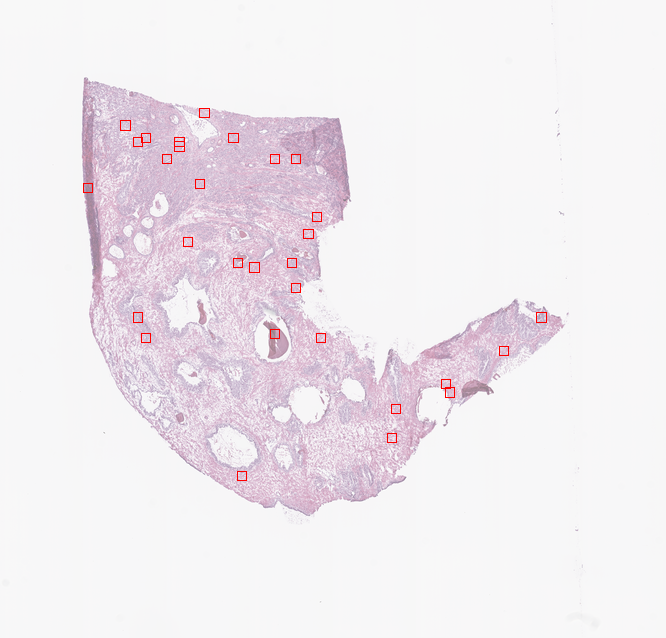

In [11]:
random_tiles_extractor.locate_tiles(
    slide=prostate_slide,
    scale_factor=24,  # default
    alpha=128,  # default
    outline="red",  # default
)

In [12]:
random_tiles_extractor.extract(prostate_slide)

In [14]:
from histolab.tiler import GridTiler

In [15]:
grid_tiles_extractor = GridTiler(
   tile_size=(512, 512),
   level=0,
   check_tissue=False, # default
   pixel_overlap=0, # default
   prefix="grid/", # save tiles in the "grid" subdirectory of slide's processed_path
   suffix=".png" # default
)
# check_tissue=True, # default
#     tissue_percent=80.0, # default

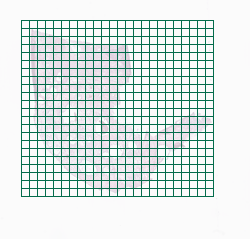

In [16]:
grid_tiles_extractor.locate_tiles(
    slide=prostate_slide,
    scale_factor=64,
    alpha=64,
    outline="#046C4C",
)

In [19]:
grid_tiles_extractor.extract(prostate_slide)

In [11]:
grid_tiles_extractor = GridTiler(
   tile_size=(224, 224),
   level=0,
   check_tissue=True, # default
   tissue_percent=50.0,
   pixel_overlap=0, # default
   prefix="grid1/", # save tiles in the "grid" subdirectory of slide's processed_path
   suffix=".png" # default
)
# check_tissue=True, # default
#     tissue_percent=80.0, # default

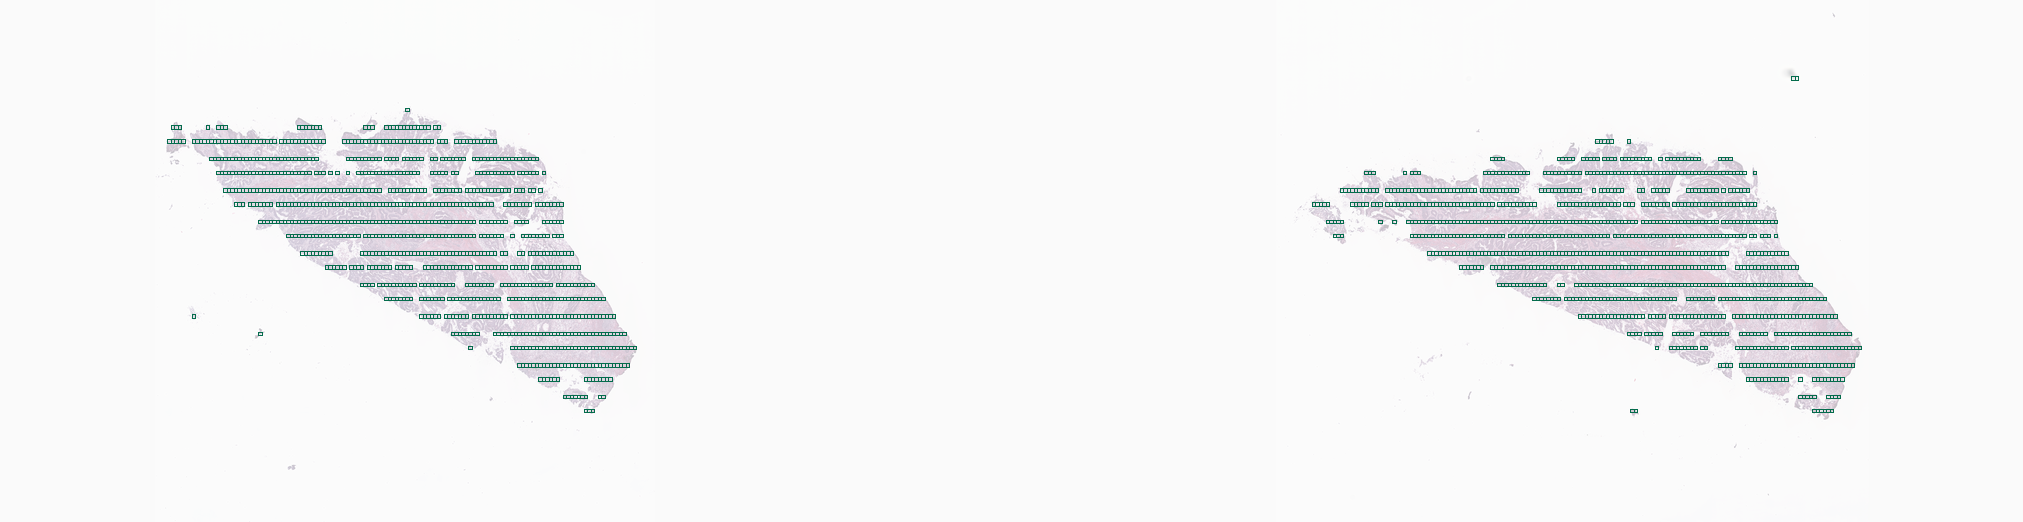

In [12]:
grid_tiles_extractor.locate_tiles(
    slide=prostate_slide,
    scale_factor=64,
    alpha=64,
    outline="#046C4C",
)

In [13]:
grid_tiles_extractor.extract(prostate_slide)

In [14]:
30310*20711/224/224

12510.96958705357

In [2]:
import openslide
from openslide import deepzoom
import matplotlib.pyplot as plt

In [4]:
with openslide.OpenSlide(r"F:\TMP\TCGA-3L-AA1B-01Z-00-DX1.8923A151-A690-40B7-9E5A-FCBEDFC2394F.svs") as slide:
    print(slide.level_count)
    print(slide.dimensions)
    print(slide.level_dimensions)
    print(slide.level_downsamples)
    print(slide.associated_images)

4
(95615, 74462)
((95615, 74462), (23903, 18615), (5975, 4653), (2987, 2326))
(1.0, 4.000116473747436, 16.002759635885248, 32.01163799220526)
<_AssociatedImageMap {'thumbnail': <PIL.Image.Image image mode=RGBA size=986x768 at 0x20260BE2070>}>


In [5]:
with openslide.OpenSlide(r"F:\TMP\TCGA-AA-3846-01Z-00-DX1.d6233d91-4d33-424a-99c1-8173fbeb5090.svs") as slide:
    print(slide.level_count)
    print(slide.dimensions)
    print(slide.level_dimensions)
    print(slide.level_downsamples)
    print(slide.associated_images)

3
(29440, 44288)
((29440, 44288), (7360, 11072), (1840, 2768))
(1.0, 4.0, 16.0)
<_AssociatedImageMap {'thumbnail': <PIL.Image.Image image mode=RGBA size=510x768 at 0x2026105C730>}>


In [6]:
with openslide.OpenSlide(r"F:\TMP\TCGA-AA-3846-01Z-00-DX1.d6233d91-4d33-424a-99c1-8173fbeb5090.svs") as slide:
    for i in range(10, 100, 10):
        print("对于下采样%d倍，其最好的level是%d" % (i, slide.get_best_level_for_downsample(i)))

对于下采样10倍，其最好的level是1
对于下采样20倍，其最好的level是2
对于下采样30倍，其最好的level是2
对于下采样40倍，其最好的level是2
对于下采样50倍，其最好的level是2
对于下采样60倍，其最好的level是2
对于下采样70倍，其最好的level是2
对于下采样80倍，其最好的level是2
对于下采样90倍，其最好的level是2


In [7]:
with openslide.OpenSlide(r"F:\TMP\TCGA-3L-AA1B-01Z-00-DX1.8923A151-A690-40B7-9E5A-FCBEDFC2394F.svs") as slide:
    for i in range(10, 100, 10):
        print("对于下采样%d倍，其最好的level是%d" % (i, slide.get_best_level_for_downsample(i)))

对于下采样10倍，其最好的level是1
对于下采样20倍，其最好的level是2
对于下采样30倍，其最好的level是2
对于下采样40倍，其最好的level是3
对于下采样50倍，其最好的level是3
对于下采样60倍，其最好的level是3
对于下采样70倍，其最好的level是3
对于下采样80倍，其最好的level是3
对于下采样90倍，其最好的level是3
